In [52]:
import pandas as pd
df = pd.read_csv('train.csv')

y = df.iloc[:, 43].values
y


array([ 65.,  60.,  27., ..., 259., 118., 140.])

In [2]:
df.columns

Index(['id', 'name', 'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'host_id', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'country_code', 'country', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_ch

In [3]:
%store
filteredXs = df[[
  'host_location','host_response_time','host_response_rate', 'host_is_superhost', 'host_listings_count', 
  'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
  'city', 'state', 'zipcode', 'market', 'country_code', 'country', 'property_type', 'room_type', 'accommodates',
  'bathrooms', 'bedrooms', 'beds', 'bed_type', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
  'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
  'review_scores_checkin', 'review_scores_communication','review_scores_value', 'instant_bookable', 
  'is_business_travel_ready', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification', 
  'calculated_host_listings_count', 'reviews_per_month'
  ]]

filteredXs.columns

Stored variables and their in-db values:


Index(['host_location', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'country_code', 'country', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_value',
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

In [4]:
%store
filteredXs.head(10)

Stored variables and their in-db values:


,host_location,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,city,...,review_scores_checkin,review_scores_communication,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,"Cologne, North Rhine-Westphalia, Germany",within a few hours,100%,f,5.0,t,f,Bedford-Stuyvesant,Brooklyn,Brooklyn,...,NaN,NaN,NaN,f,f,strict_14_with_grace_period,f,f,5,NaN
1,"New York, New York, United States",within a day,100%,f,2.0,t,f,Williamsburg,Brooklyn,Brooklyn,...,10.0,10.0,10.0,f,f,strict_14_with_grace_period,f,f,2,0.12
2,"Staten Island, New York, United States",within an hour,83%,f,2.0,t,f,Randall Manor,Staten Island,Staten Island,...,9.0,9.0,9.0,t,f,flexible,f,f,2,0.79
3,"New York, New York, United States",within an hour,100%,f,1.0,t,f,East Village,Manhattan,New York,...,9.0,9.0,9.0,t,f,strict_14_with_grace_period,f,f,1,5.64
4,"Vélizy-Villacoublay, Île-de-France, France",NaN,NaN,f,1.0,t,f,Williamsburg,Brooklyn,Brooklyn,...,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN
5,US,NaN,NaN,f,1.0,t,t,Financial District,Manhattan,New York,...,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN
6,"New York, New York, United States",within an hour,100%,f,1.0,t,t,Chelsea,Manhattan,New York,...,9.0,9.0,8.0,f,f,strict_14_with_grace_period,f,f,2,2.68
7,"New York, New York, United States",NaN,NaN,f,1.0,t,f,Theater District,Manhattan,New York,...,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN
8,"New York, New York, United States",NaN,NaN,f,2.0,t,t,Bay Ridge,Brooklyn,Brooklyn,...,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN
9,"Brooklyn, New York, United States",a few days or more,43%,f,1.0,t,t,Crown Heights,Brooklyn,Brooklyn,...,10.0,10.0,10.0,f,f,strict_14_with_grace_period,f,f,1,0.83


In [164]:
from math import isnan

def to_float(s):
    try:
        ret = float(s)
    except:
        ret = -1
    if isnan(ret):
        ret = -1
    return ret

def to_int(s):
    try:
        ret = int(s)
    except:
        ret = -1
    return ret

categories = [x for x in list(set(df['neighbourhood_group_cleansed'])) if type(x) is str]
state_categories = [x for x in list(set(df['state'])) if type(x) is str]
state_categories = [x for x in list(set(df['state'])) if type(x) is str]
room_categories = [x for x in list(set(df['room_type'])) if type(x) is str]
super_host_categories = [x for x in list(set(df['host_is_superhost'])) if type(x) is str]
bed_type_categories = [x for x in list(set(df['bed_type'])) if type(x) is str]
cancellation_policy_categories = [x for x in list(set(df['cancellation_policy'])) if type(x) is str]
host_response_categories = [x for x in list(set(df['host_response_time'])) if type(x) is str]
print(len(categories))

def create_feature(row):
    guest_num = to_int(row.guests_included)
    guest_cap = to_int(row.extra_people)
    bedrooms = to_int(row.bedrooms)
    bathrooms = to_int(row.bathrooms)
    review = to_float(row.review_scores_rating)
    review_scores_location = to_float(row.review_scores_location)
    cleanliness_review = to_int(row.review_scores_cleanliness)
    review_scores_rating = to_int(row.review_scores_rating)
    accommodates = to_int(row.accommodates)
    reviews_per_month = to_int(row.reviews_per_month)
    host_listing_count = to_float(row.calculated_host_listings_count)
    review_scores_accuracy = to_int(row.review_scores_accuracy)
    num_of_review = to_int(row.number_of_reviews)
    one_hot = [int(row.neighbourhood_group_cleansed == category) for category in categories]
    two_hot = [int(row.state == state_category) for state_category in state_categories]
    three_hot = [int(row.room_type == room_category) for room_category in room_categories]
    four_hot = [int(row.host_is_superhost == super_host_category) for super_host_category in super_host_categories]
    five_hot = [int(row.bed_type == bed_type_category) for bed_type_category in bed_type_categories]
    # six_hot = [int(row.cancellation_policy == cancelation_policy_category) for cancelation_policy_category in cancellation_policy_categories]
    seven_hot = [int(row.host_response_time == host_response_category) for host_response_category in host_response_categories]
    
    return [accommodates, bedrooms, bathrooms, reviews_per_month, num_of_review, review_scores_rating,review_scores_accuracy] + one_hot + two_hot + three_hot + four_hot + seven_hot

train_X, train_y = [], []
for (idx, row) in df.iterrows():
    price = float(row.price)
    feature = create_feature(row)

    train_X.append(feature)
    train_y.append(price)

print(len(train_X), len(train_y))

5
23477 23477


In [72]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt


/home/wthunder/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/wthunder/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/wthunder/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/wthunder/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardS

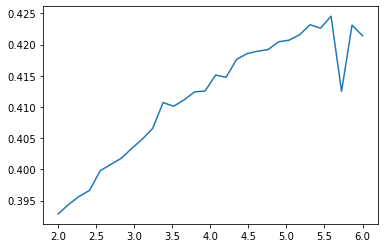

In [75]:
#scaler_X = StandardScaler().fit(train_X)
#train_X = scaler_X.transform(train_X)

# regr = SVR(C=5.5, kernel='poly', max_iter=50000)
# print(np.mean(cross_val_score(regr, train_X, train_y, cv=5, n_jobs=6)))

c_values = []
scores = []

for i in np.linspace(2.0, 6.0, 30):
  mean = np.mean(cross_val_score(SVR(C=i, kernel='poly', max_iter=500000), train_X, train_y, cv=5, n_jobs=8))
  c_values.append(i)
  scores.append(mean)

plt.plot(c_values, scores)
plt.show()



#for i in range(1, 50):
#  score = cross_val_score(MLPRegressor(activation='relu', alpha=1e-05, hidden_layer_sizes=(i,), random_state=1, max_iter=300), train_X, train_y, cv=5, n_jobs=4)
#  if(np.mean(score) > bestAvg):
#    bestAvg = np.mean(score)
#    bestSize = i


In [165]:
scaler_X = StandardScaler().fit(train_X)
train_X = scaler_X.transform(train_X)

regr = SVR(C=5.0, kernel='poly', degree=3, max_iter=500000, epsilon=0.2)
print(np.mean(cross_val_score(regr, train_X, train_y, cv=5, n_jobs=8)))

0.37844891814499243


In [150]:
scaler_X = StandardScaler().fit(train_X)
train_X = scaler_X.transform(train_X)

regr = SVR(C=5.0, kernel='poly', degree=3, max_iter=500000)
print(np.mean(cross_val_score(regr, train_X, train_y, cv=5, n_jobs=8)))

0.4122673401447677


In [44]:
regr.fit(train_X, train_y)

/home/wthunder/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2, max_iter=10000))])

In [308]:
test_df = pd.read_csv('test.csv')
test_ids, test_X = [], []
for (idx, row) in test_df.iterrows():
  feature = create_feature(row)
  test_ids.append(row.id)
  test_X.append(feature)
test_y = regr.predict(test_X)


output_df = pd.DataFrame()
output_df['Id'] = test_ids
output_df['Predicted'] = test_y
output_df.to_csv('mlpregressor_prediction.csv', index=False)



In [279]:
# Setting up the neural net classifier
regr = MLPRegressor(activation='logistic', alpha=0.0001, hidden_layer_sizes=(80, 50), random_state=1, max_iter=3000)

print(np.mean(cross_val_score(regr, train_X, train_y, cv=5, n_jobs=6)))

bestSize = 0
bestAvg = 0

#for i in range(1, 50):
#  score = cross_val_score(MLPRegressor(activation='relu', alpha=1e-05, hidden_layer_sizes=(i,), random_state=1, max_iter=300), train_X, train_y, cv=5, n_jobs=4)
#  if(np.mean(score) > bestAvg):
#    bestAvg = np.mean(score)
#    bestSize = i


0.48313770821271473
